In [1]:
import polars as pl
import pandas as pd
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ET
from datetime import datetime
import sys, os, requests
import numpy as np
import ulmo

import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import networkx as nx
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from torch_cluster import knn_graph

# Thoughts on feature engineering: 
* Autocorrelation
* Elevation and lat/lon. Maybe normalize and multiply the target variable?
* Remove seasonality

In [63]:
#Using avg_prec to find correlation?

target_var=df.iloc[:, 11:].replace(0, np.nan)
features=df.iloc[:, :11] #No site data
target_mean=target_var.mean(axis=1)

In [172]:
date_col = df.iloc[:, 0]
x1=df.iloc[:, 1:13].drop(columns=['301_CA_SNTL_PREC'])
x1 = x1.set_index(date_col)

In [173]:
x1=x1[x1.index.year > 1996]

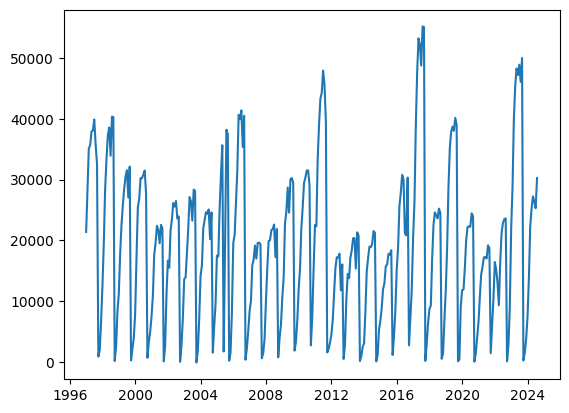

In [174]:
plt.plot(x1.iloc[:, -1])

In [176]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x1 = scaler.fit_transform(x1)

scaled_x1 = pd.DataFrame(scaled_x1)
matrix=scaled_x1.corr()

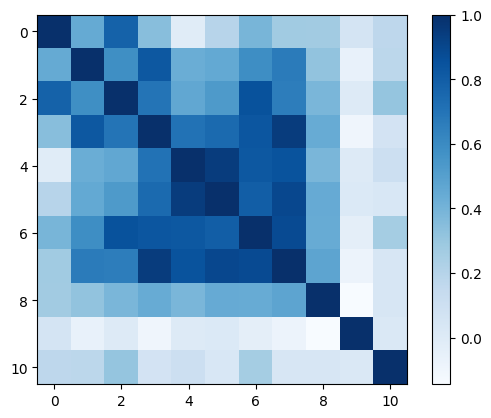

In [177]:
plt.imshow(matrix, cmap='Blues')
plt.colorbar()

In [180]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(x1.iloc[:, -1])
deseasonalized = results.trend + results.resid

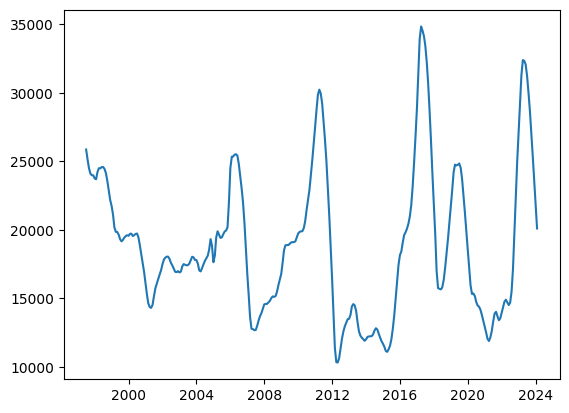

In [183]:
plt.plot(results.trend)

In [187]:
results.resid.shape

(332,)